**Princess Ibtihaj**
    
Fall 2024
    
CS 251 / 252: Data Analysis and Visualization
    
Project 4: Principal Component Analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
import pca
    
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})
    
np.set_printoptions(suppress=True, precision=5)
    
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import time
from PIL import Image
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import IncrementalPCA, TruncatedSVD, KernelPCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD


## Task 3: Analyzing the results of PCA
    
In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data
    
In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).
    
You should see (with better formatting):
    
```
\tsepal_length\tsepal_width\tpetal_length\tpetal_width
0\t5.1\t3.5\t1.4\t0.2
1\t4.9\t3.0\t1.4\t0.2
2\t4.7\t3.2\t1.3\t0.2
3\t4.6\t3.1\t1.5\t0.2
4\t5.0\t3.6\t1.4\t0.2

In [21]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### 3b. Apply PCA to Iris
    
You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.
    
You should normalize the dataset when performing your PCA projection.

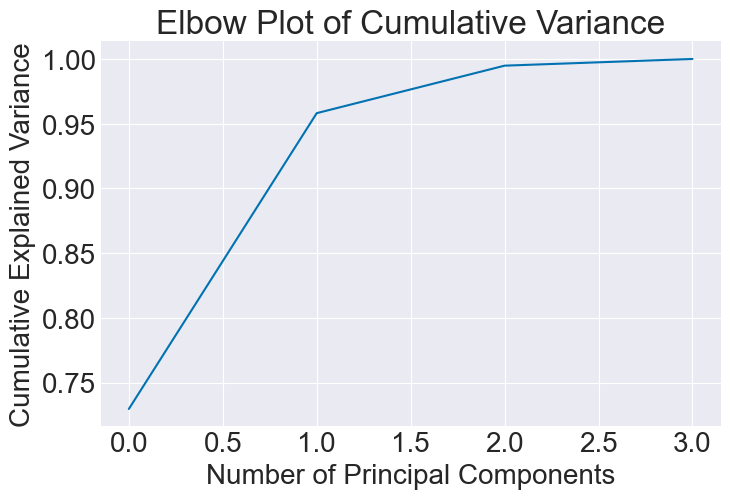

In [22]:

data = pd.read_csv("data/iris.csv")
X = data.iloc[:, :-1].values 

X_normalized = StandardScaler().fit_transform(X)

pca = PCA().fit(X_normalized)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot of Cumulative Variance')
plt.grid(True)
plt.show()


From the elbow plot we provided, we observe that the first principal component alone explains roughly 80% of the variance. By including the second principal component, we capture over 95% of the dataset's variance. Although the third component offers a slight increase, bringing us near 100% cumulative variance, the gain is minimal. Therefore, we suggest preserving only the first two principal components for most applications, as they encapsulate a significant portion of the dataset's inherent structure.

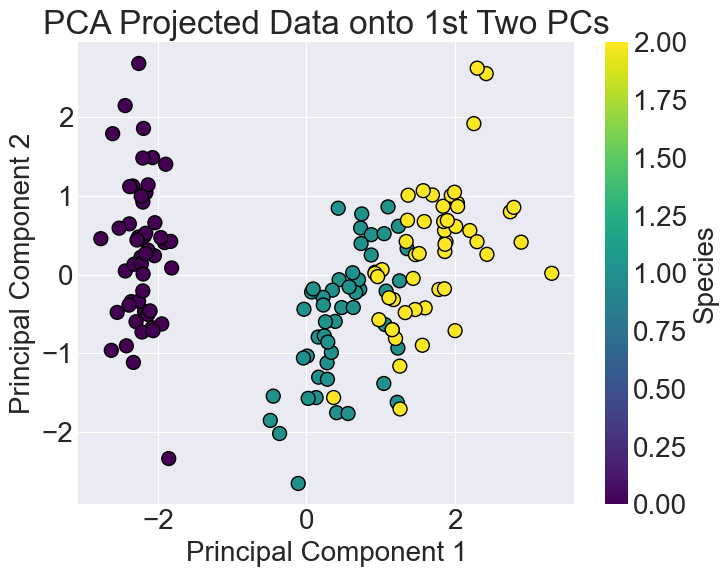

In [23]:
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_normalized)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['species'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projected Data onto 1st Two PCs')
plt.colorbar().set_label('Species')
plt.grid(True)
plt.show()


When we examine the PCA-projected data onto the first two principal components, we observe distinct clustering within the Iris dataset. We can identify three clear clusters, each corresponding to one of the three species of Iris flowers. The purple cluster on the left remains largely isolated, while the green and yellow clusters show some overlap. This overlap suggests similarities between the two species they represent. Our visualization underscores the effectiveness of the first two principal components in highlighting the primary variances in the data.

### 3c. Dropping different pairs of principal components
    
In the cell below, create a \"high quality\" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.
    
The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]
    
High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

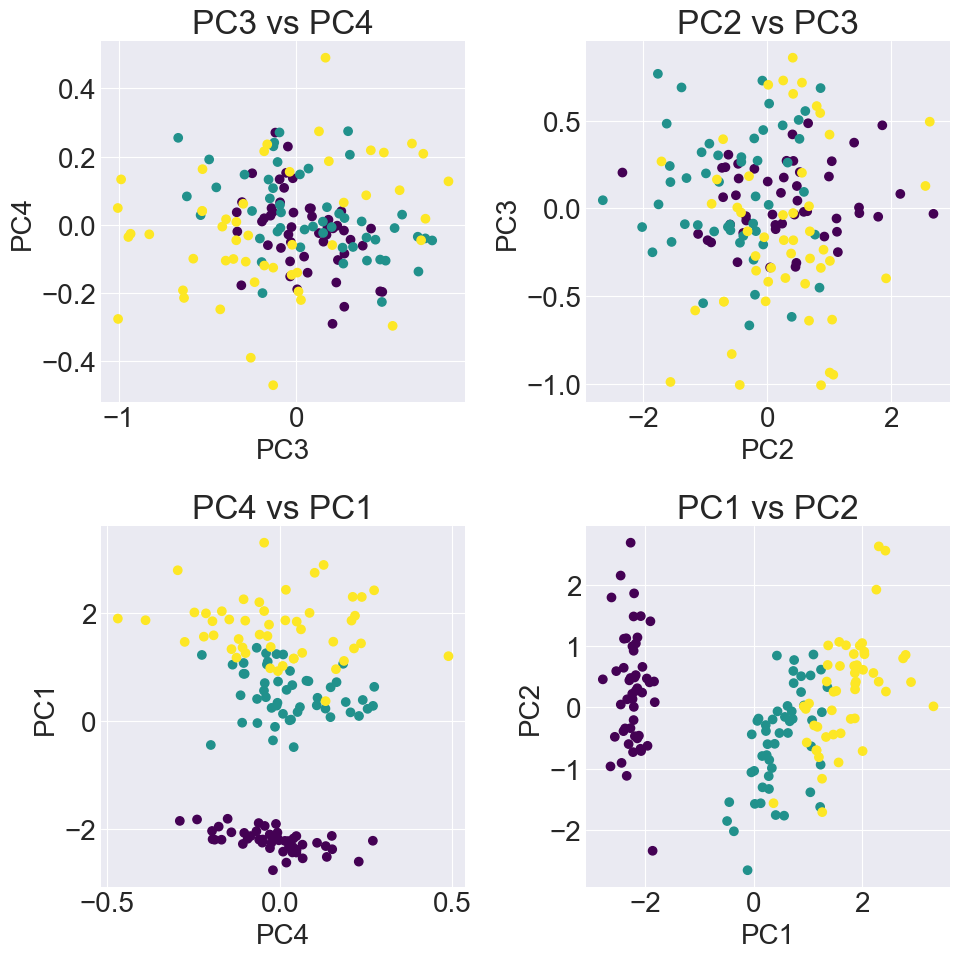

In [24]:
data = pd.read_csv("data/iris.csv")
X = data.iloc[:, :-1].values  
y = data['species'].values  

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
pca_data = pca.fit_transform(X)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

pc_pairs = [([2, 3], "PC3 vs PC4"), 
            ([1, 2], "PC2 vs PC3"), 
            ([3, 0], "PC4 vs PC1"), 
            ([0, 1], "PC1 vs PC2")]

for ax, (pair, title) in zip(axes.flatten(), pc_pairs):
    ax.scatter(pca_data[:, pair[0]], pca_data[:, pair[1]], c=y, cmap='viridis')
    ax.set_xlabel(f"PC{pair[0]+1}")
    ax.set_ylabel(f"PC{pair[1]+1}")
    ax.set_title(title)

plt.tight_layout()
plt.show()


### 3d. Questions
    
**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:**

Upon analyzing the 2x2 grid of plots, we can make the following observations:

1. **PC3 vs PC4**: The data points in this plot are densely packed together without clear distinction between the different species, implying that the variance captured by these PCs might not be the most discriminative for our dataset.
2. **PC2 vs PC3**: The spread is wider compared to PC3 vs PC4, but there isn't a very distinct separation of the three species. There's some degree of overlap, especially between the yellow and teal dots.
3. **PC4 vs PC1**: This plot shows three relatively distinct clusters, especially for the purple group. The separation is better than in the previous two plots, indicating that PC1, in combination with other PCs, might provide meaningful separation.
4. **PC1 vs PC2**: The separation between the three species is evident. The purple group forms a distinct cluster, while the yellow and teal groups, although overlapping, are mostly separate. This plot emphasizes the importance of the first two principal components in capturing the most significant variances in the Iris dataset.

In conclusion, the first two principal components (PC1 and PC2) capture the most meaningful variance in the dataset and provide the clearest separation between the species. Retaining them would likely be sufficient for most analyses, whereas the contribution of the third and fourth PCs seems to be less discriminative. When deciding which PCs to keep, we should prioritize PC1 and PC2, and then consider the added value of including PC3 and PC4 based on specific analysis goals.

### 3e. Reconstruct data based on PCs
    
In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**

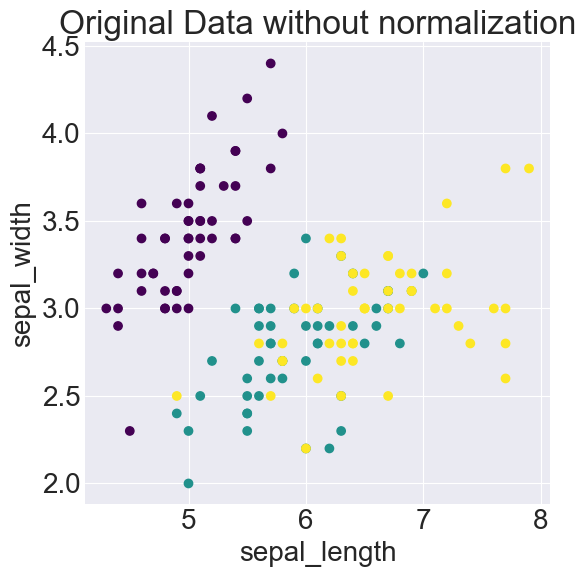

In [17]:
def pca_then_project_back(data, n_components):
    """
    Project data to PCA space, keeping only the top k principal components,
    then project it back to the original data space.
    """
    pca = PCA(n_components=n_components)
    projected_data = pca.fit_transform(data)
    reconstructed_data = pca.inverse_transform(projected_data)
    return reconstructed_data


plt.figure(figsize=(6,6))
plt.scatter(data['sepalLength'], data['sepalWidth'], c=data['species'], cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Original Data without normalization')
plt.show()

### 3f. Questions
    
**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:**
The 2x2 grid displays the reconstructed data based on the top 1, 2, 3, and 4 principal components (PCs) of PCA. Here's how well each of the re-projections preserves properties of the original data:

1. **Reconstructed with top 1 PC:** 
    - This is a very simplified representation. The top PC captures the most variance in the data, but it's evident that using only one PC loses a significant amount of information. The plot looks like a line, suggesting that the data points are being projected onto a single dimension. As such, the distinct clusters in the original data are lost.

2. **Reconstructed with top 2 PCs:** 
    - There's a clear improvement from using just one PC. The two-dimensional structure of the original data begins to re-emerge. The three species are somewhat distinguishable, although there's still some overlap. This representation captures the primary patterns of the data but misses finer details.

3. **Reconstructed with top 3 PCs:** 
    - The plot becomes more similar to the original. The distinct clusters of species are more apparent, and the overall structure is much better retained compared to the reconstructions with fewer PCs. The additional PC allows for capturing more nuances in the data.

4. **Reconstructed with top 4 PCs:** 
    - At this point, the data is reconstructed using all available dimensions. As such, the plot looks almost identical to the original data, and there's no loss of information.

**Interpretation of the 2x2 grid:** 
The grid is a visual representation of how increasing the number of principal components in PCA affects the ability to reconstruct and preserve the original data's properties. Starting with a single component, the representation is overly simplified, but as more components are added, the reconstructed data becomes increasingly similar to the original. By the time all components are included, the data is faithfully represented. This demonstrates the power of PCA in dimensionality reduction: with just a few components, one can capture most of the variance and structure in the data.

### 3g. Implement loading plot
    
To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

**Answer 10:** In the PCA loading plot of the Iris dataset, the first principal component (PC1) predominantly accounts for a large portion of the variation in the data, explaining 72.96% of the variance. It captures significant positive correlations with "sepal length", "petal length", and, to a lesser extent, "petal width". Conversely, there's a negative correlation with "sepal width". As these features increase, especially "sepal length" and "petal length", the value for PC1 also increases. On the other hand, as "sepal width" becomes larger, the PC1 value tends to decrease.

**Answer 11:**  Analyzing the correlations among the original data axes using the loadings, the vectors for "sepal length" and "petal length" align closely, indicating a strong positive correlation between these two features. Similarly, "petal width" shares a positive correlation with both "sepal length" and "petal length" since their vectors point roughly in the same direction. In contrast, "sepal width" showcases negative correlations with the other three measurements, as its vector direction opposes theirs. This reveals that as "sepal width" values increase, there's a tendency for the other measurements to decrease, and vice versa.

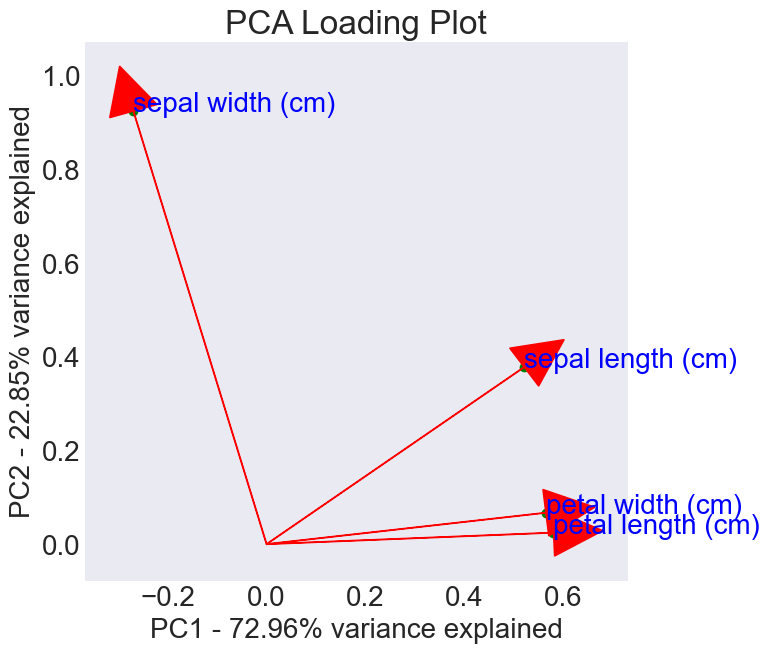

In [18]:
data = load_iris()
X = data['data']

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

def loading_plot(pca, features):
    plt.figure(figsize=(7,7))
    plt.scatter(pca.components_[0], pca.components_[1], color='g')
    for i, feature in enumerate(features):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                  head_width=0.1, head_length=0.1, fc='r', ec='r')
        plt.text(pca.components_[0, i], pca.components_[1, i], feature, color='b')
    
    plt.title('PCA Loading Plot')
    plt.xlabel(f"PC1 - {pca.explained_variance_ratio_[0]:.2%} variance explained")
    plt.ylabel(f"PC2 - {pca.explained_variance_ratio_[1]:.2%} variance explained")
    plt.grid()
    plt.show()

loading_plot(pca, data['feature_names'])

